In [1]:
# Import Libraries
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product
from statsmodels.tsa.arima.model import ARIMA


In [2]:
plt.rcParams['figure.figsize'] = [6, 6]

In [3]:
# Load Johnson and Johnson data
# Load the dataset
jj_data = pd.read_csv('./jj.csv')
jj_data
jj_data['date'] = pd.to_datetime(jj_data['date'])
# Set the date column as the index for time series
jj_data.set_index('date', inplace=True)

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


In [4]:
jj_data.index

RangeIndex(start=0, stop=84, step=1)

In [5]:
# Load Amazon data
# Load the dataset
amzn_data = pd.read_csv('./AMZN.csv')
amzn_data['Date']=pd.to_datetime(amzn_data['Date'])
# Set the date column as the index for time series
amzn_data.set_index('Date',inplace=True)

amzn_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,72.324501,74.438499,72.324501,73.417503,73.417503,129984000
2018-02-21,74.250000,75.174500,73.945999,74.146004,74.146004,126088000
2018-02-22,74.767998,75.126999,73.788002,74.266998,74.266998,97162000
2018-02-23,74.766998,75.000000,74.324997,75.000000,75.000000,88362000
2018-02-26,75.459999,76.141998,75.349998,76.097504,76.097504,99100000


In [6]:
amzn_data['Close'].info

<bound method Series.info of Date
2018-02-20     73.417503
2018-02-21     74.146004
2018-02-22     74.266998
2018-02-23     75.000000
2018-02-26     76.097504
                 ...    
2023-02-13     99.540001
2023-02-14     99.699997
2023-02-15    101.160004
2023-02-16     98.150002
2023-02-17     97.199997
Name: Close, Length: 1259, dtype: float64>

In [7]:
amzn_data.index

DatetimeIndex(['2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23',
               '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01',
               '2018-03-02', '2018-03-05',
               ...
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-13', '2023-02-14', '2023-02-15',
               '2023-02-16', '2023-02-17'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

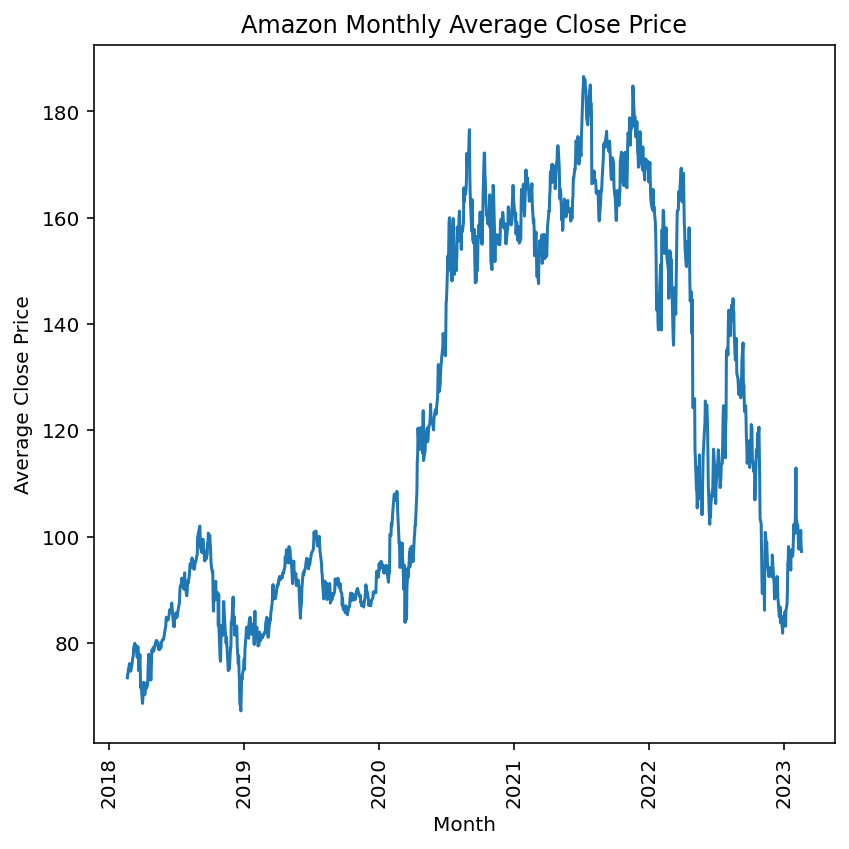

In [8]:


# Plot
# Plot the data
fig, ax = plt.subplots(dpi=144)
# Plot the data
plt.plot(amzn_data['Close'])
plt.title('Amazon Monthly Average Close Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
amzn_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,72.324501,74.438499,72.324501,73.417503,73.417503,129984000
2018-02-21,74.250000,75.174500,73.945999,74.146004,74.146004,126088000
2018-02-22,74.767998,75.126999,73.788002,74.266998,74.266998,97162000
2018-02-23,74.766998,75.000000,74.324997,75.000000,75.000000,88362000
2018-02-26,75.459999,76.141998,75.349998,76.097504,76.097504,99100000
...,...,...,...,...,...,...
2023-02-13,97.849998,99.680000,96.910004,99.540001,99.540001,52841500
2023-02-14,98.410004,100.919998,97.519997,99.699997,99.699997,56202900
2023-02-15,99.089996,101.169998,98.449997,101.160004,101.160004,48053900


### Plot Graphs for J&J and Amazon sales data 

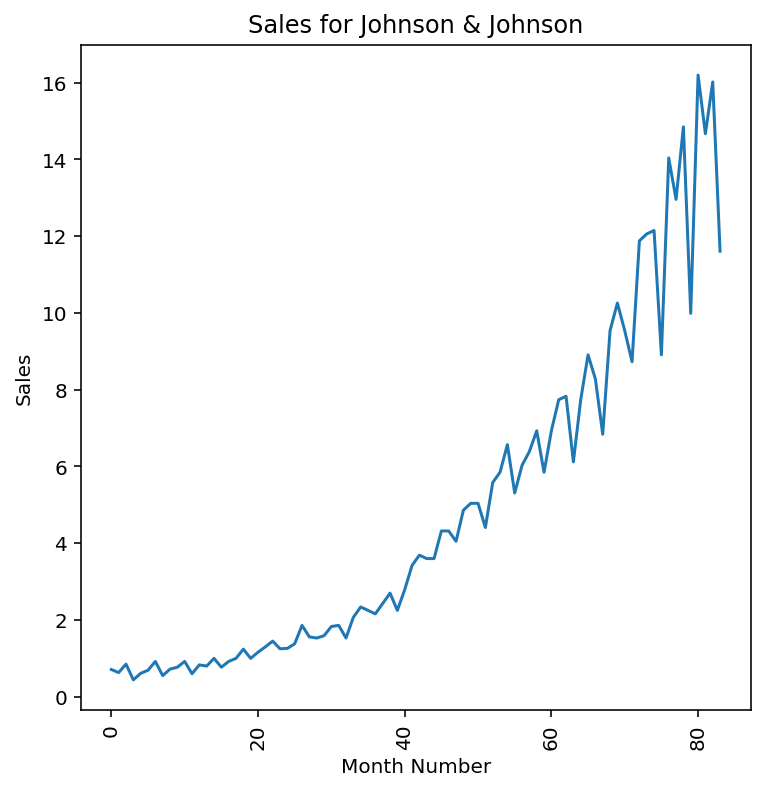

In [10]:
# Plot for amazon data 
# Plot the data
fig, ax = plt.subplots(dpi=144)
# Plot the data
plt.plot(amzn_data['Close'])
plt.title('Amazon Sales')
plt.ylabel('Sales')
plt.xlabel('Month Number')
plt.xticks(rotation=90)
plt.show()

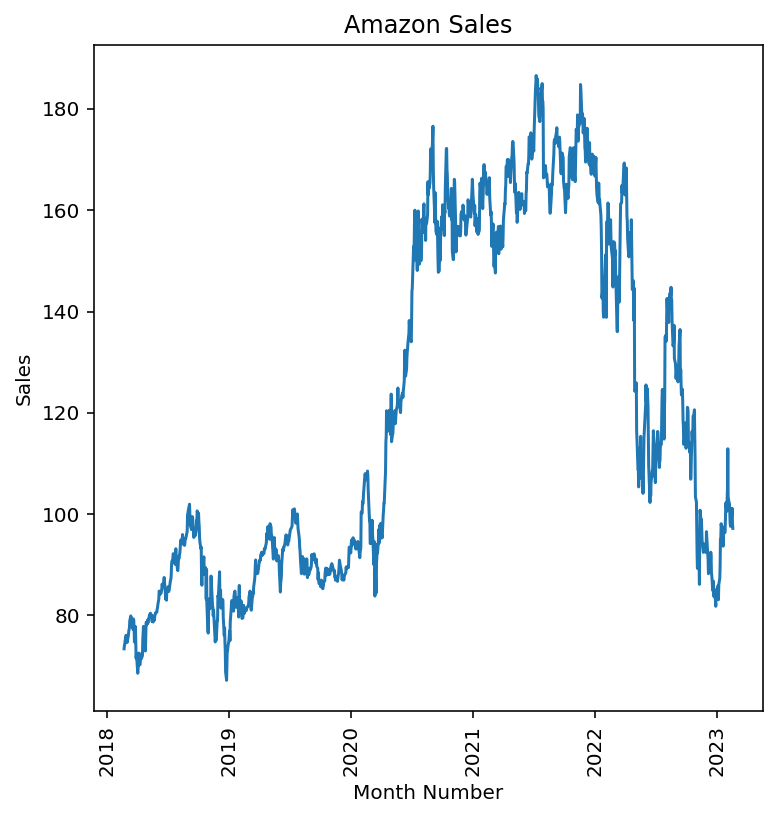

In [11]:
# plot the ACF and PACF for Johnson and Johnson
# Plot the data
plot_pacf(jj_data['data']);
# Plot the data
plot_acf(jj_data['data']);
plt.show()

### ACF and PCAF

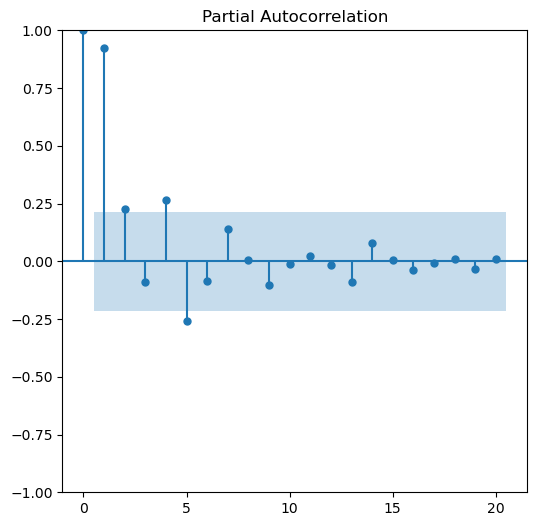

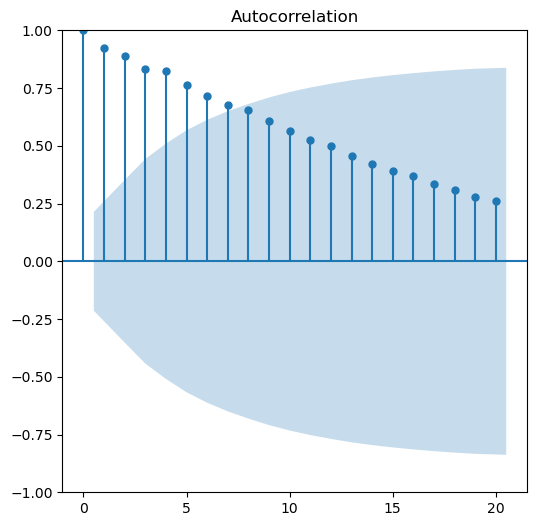

In [12]:
# ADF Test for J&J data 
ad_fuller_result = adfuller(jj_data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

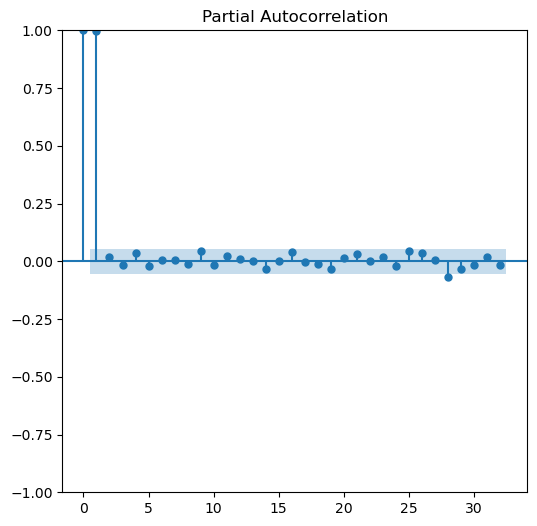

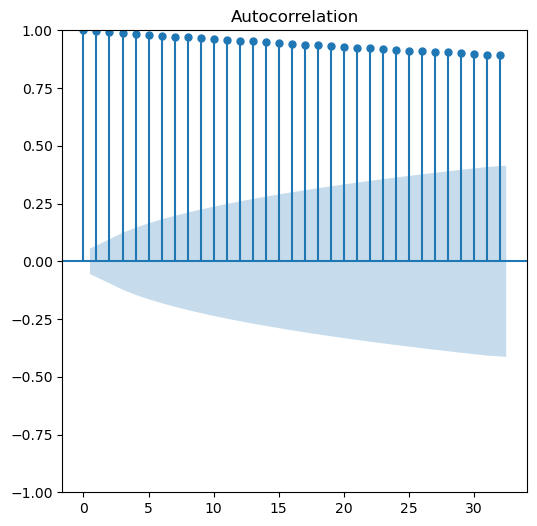

In [13]:
# ADF Test for Amazon data 
ad_fuller_result = adfuller(amzn_data['Close'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

### ADF Test for stationarity

In [14]:
# Plot the data
plt.plot(jj_data['data_tr_1'])
plt.title("Log Difference of Johnson & Johnson Sales")
plt.show()

ADF Statistic: 2.742016573457468
p-value: 1.0


In [15]:
ad_fuller_result = adfuller(jj_data['data_tr_1'][1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.657808991333173
p-value: 0.45297105465166737


### Make Data Stationary

#### Johnson and Johnson (Log Transform)

In [16]:
# Plot the data
plt.plot(amzn_data['data_tr_1'])
plt.title("Log Difference of Amazon Sales")
plt.show()

,date,data,data_log,data_tr_1
0,1960-01-01,0.71,-0.342490,NaN
1,1960-04-01,0.63,-0.462035,-0.119545
2,1960-07-02,0.85,-0.162519,0.299517
3,1960-10-01,0.44,-0.820981,-0.658462
4,1961-01-01,0.61,-0.494296,0.326684
5,1961-04-02,0.69,-0.371064,0.123233
6,1961-07-02,0.92,-0.083382,0.287682
7,1961-10-01,0.55,-0.597837,-0.514455
8,1962-01-01,0.72,-0.328504,0.269333
9,1962-04-02,0.77,-0.261365,0.067139


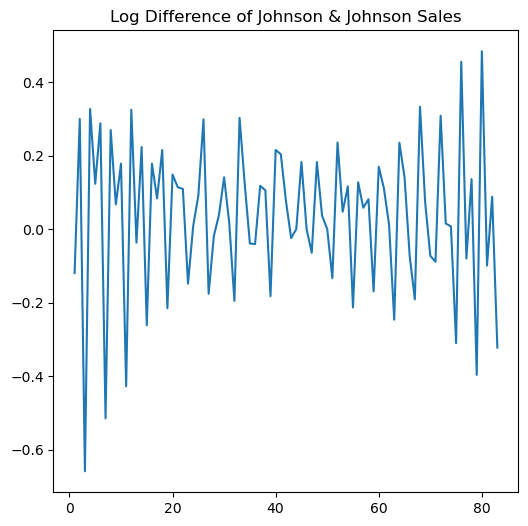

In [17]:
ad_fuller_result = adfuller(amzn_data['data_tr_1'][1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

In [18]:
# define model
# p,d,q ARIMA Model
#model = ARIMA(y, order=(1,0,1))
#model is a particular model with the p,d,q parameters specified

# Define ARIMA model with selected parameters
model = ARIMA(jj_data['data'], order=(3,1,3))

ADF Statistic: -4.317043945811842
p-value: 0.00041497314044405755


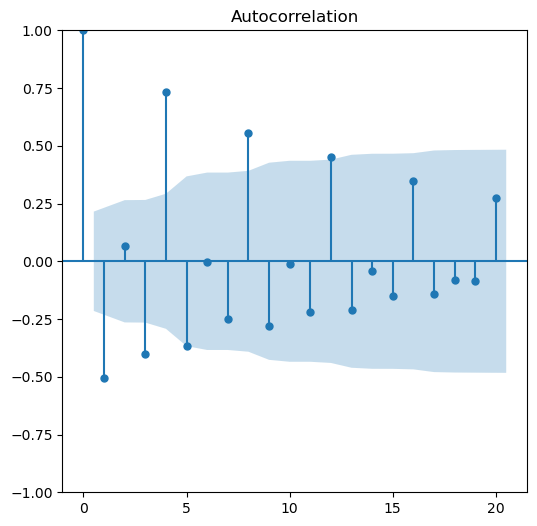

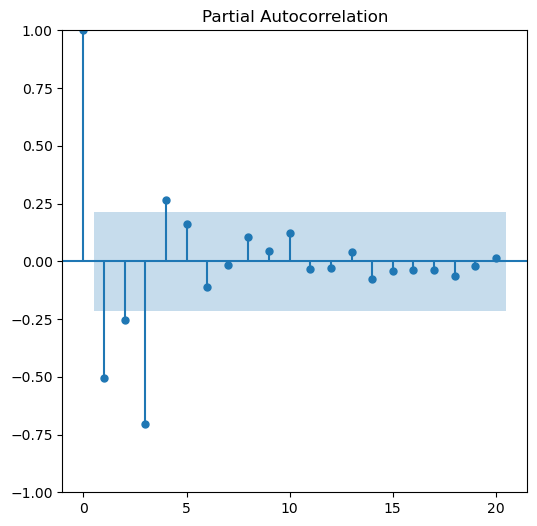

In [19]:
# record best model fit in a parameter called model_fit
# Fit the model to training data
model_fit = model.fit()

#### Amazon Data (Log Transform)

In [20]:
# Define ARIMA model with selected parameters
def optimize_ARIMA(endog, order_list):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        endog - the observed variable, in this case data['data']
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            #model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
# Define ARIMA model with selected parameters
            model = ARIMA(endog, order=order)
# Fit the model to training data
            model_fit = model.fit()
        except:
            continue
            
# Fit the model to training data
        aic = model_fit.aic
# Fit the model to training data
        results.append([order, model_fit.aic])
        #print(order)
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
# Set the date column as the index for time series
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

,Open,High,Low,Close,Adj Close,Volume,data_log,data_tr_1
Date,,,,,,,,
2018-02-20,72.324501,74.438499,72.324501,73.417503,73.417503,129984000,4.296162,NaN
2018-02-21,74.250000,75.174500,73.945999,74.146004,74.146004,126088000,4.306036,0.009874
2018-02-22,74.767998,75.126999,73.788002,74.266998,74.266998,97162000,4.307667,0.001631
2018-02-23,74.766998,75.000000,74.324997,75.000000,75.000000,88362000,4.317488,0.009821
2018-02-26,75.459999,76.141998,75.349998,76.097504,76.097504,99100000,4.332015,0.014527
2018-02-27,76.224998,76.338997,75.360497,75.598999,75.598999,96176000,4.325443,-0.006572
2018-02-28,75.975502,76.434998,75.599998,75.622498,75.622498,90300000,4.325754,0.000311
2018-03-01,75.680000,75.924500,73.250000,74.672501,74.672501,136704000,4.313112,-0.012642
2018-03-02,73.455002,75.052498,72.750504,75.012497,75.012497,131752000,4.317655,0.004543


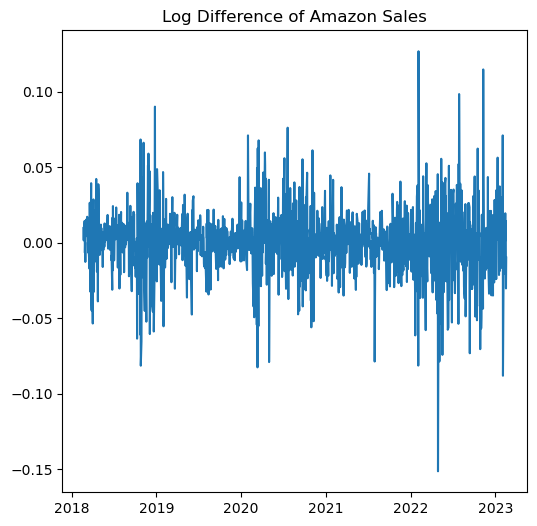

In [21]:
#order up to p=q=8


ps = range(0, 8, 1)
d = 0
qs = range(0, 8, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)

    
# print out the first few rows of order_list to check it looks right
order_list[:10]


In [22]:
# call opitimize_ARIMA

# Define ARIMA model with selected parameters
result_df = optimize_ARIMA(jj_data['data'], order_list)


# print out the ordered list. The best model fit (lowest AIC) will be shown at the top
result_df

ADF Statistic: -36.63983281274942
p-value: 0.0


In [23]:
# p,d,q ARIMA Model
# Define ARIMA model with selected parameters
best_model = ARIMA(jj_data['data'], order=(6,1,3))

# Fit the model to training data
best_model_fit = best_model.fit()

In [24]:
#summary of the model
# Fit the model to training data
print(best_model_fit.summary())

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
# Plot the data
best_model_fit.plot_diagnostics(figsize=(10,7))
plt.show()

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   84
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -76.286
Date:                Tue, 08 Apr 2025   AIC                            166.572
Time:                        00:21:40   BIC                            183.504
Sample:                             0   HQIC                           173.374
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0311      0.036    -28.913      0.000      -1.101      -0.961
ar.L2         -1.0273      0.043    -23.887      0.000      -1.112      -0.943
ar.L3         -0.9768      0.030    -32.166      0.0

In [26]:
#get prediction start and end dates
test_data = jj_data['data']

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

#get the predictions and residuals
# Fit the model to training data
predictions = best_model_fit.predict(start=pred_start_date, end=pred_end_date)
# Generate predictions using the model
residuals = test_data - predictions

In [27]:
# plot the residuals

plt.figure(figsize=(10,4))
# Plot the data
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1)]

In [28]:
# Assess the root mean square of the residuals

print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\2858361816.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/64 [00:00<?, ?it/s]

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607:

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sandr\anaconda3\Lib\site-packages\stats

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sandr\anaconda3\Lib\site-packages\stats

,"(p, d, q)",AIC
0,"(6, 1, 3)",115.735928
1,"(4, 1, 6)",115.859253
2,"(7, 1, 1)",116.061742
3,"(5, 1, 3)",116.536230
4,"(5, 1, 4)",117.242502
...,...,...
59,"(0, 1, 1)",265.481216
60,"(0, 1, 3)",265.497398
61,"(1, 1, 0)",266.632563
62,"(2, 1, 0)",267.751437


In [29]:
# Plot the model prediction against the data

plt.figure(figsize=(10,4))

# Plot the data
plt.plot(test_data)
# Plot the data
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

# Define ARIMA model with selected parameters
plt.title('ARIMA(6,1,3) model fit', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month Number', fontsize=16)

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, #'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   84
Model:                 ARIMA(6, 1, 3)   Log Likelihood                 -47.868
Date:                Tue, 08 Apr 2025   AIC                            115.736
Time:                        00:22:03   BIC                            139.924
Sample:                             0   HQIC                           125.453
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4910      0.132    -11.279      0.000      -1.750      -1.232
ar.L2         -0.7853      0.151     -5.187      0.000      -1.082      -0.489
ar.L3          0.0377      0.061      0.614      0.5

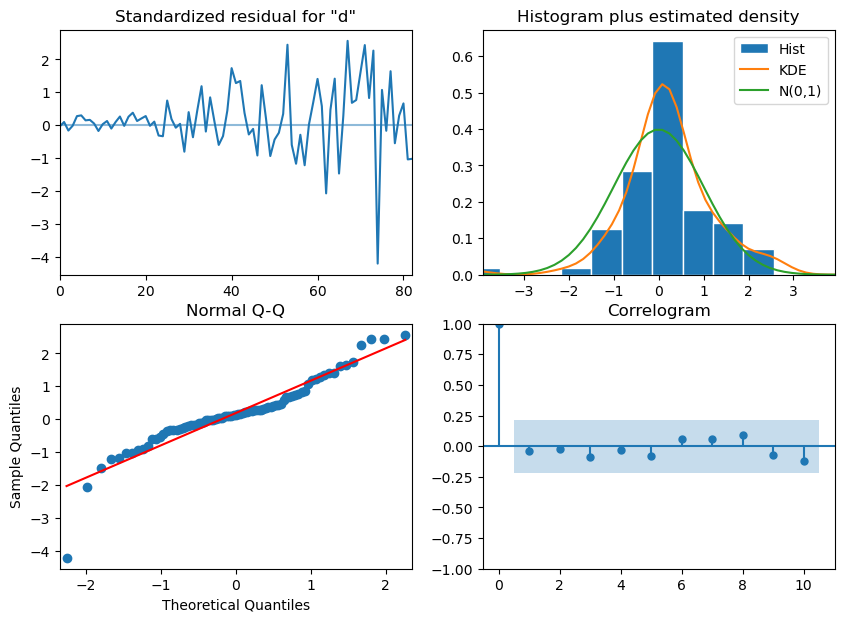

In [31]:
# Generate predictions using the model
forecast_accuracy(predictions, test_data)

In [32]:
# forecast version 1: get_prediction()

n_forecast = 24 #24 months


# Fit the model to training data
predict = best_model_fit.get_prediction(end=model.nobs + n_forecast)
# Generate predictions using the model
idx = np.arange(len(predict.predicted_mean))

# plot
# Plot the data
fig, ax = plt.subplots()
# Plot the data
ax.plot(jj_data['data'], 'blue') # plots original data
# Plot the data
ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--') #plots forecast
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month Number', fontsize=16)
plt.title('Forecast of J&J sales', fontsize=20)
plt.legend(('Data', 'Forecast'), fontsize=16)
plt.show()

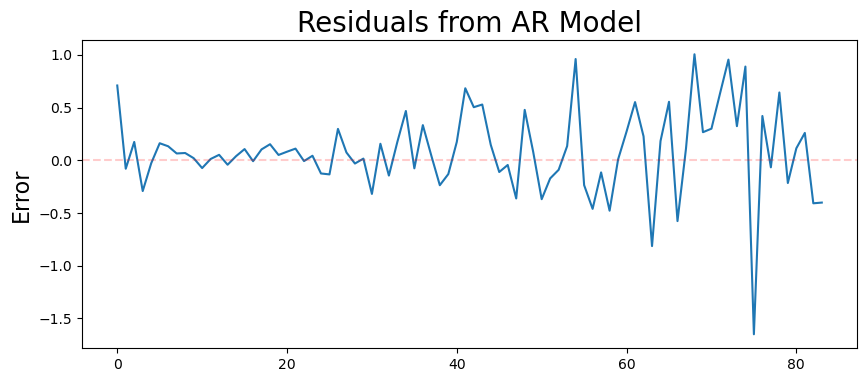

In [33]:
# use get_forecast() for this

# make the predictions for 24 steps ahead
# Fit the model to training data
predictions_int = best_model_fit.get_forecast(steps=26)
# Generate predictions using the model
predictions_int.predicted_mean

In [34]:
# Generate predictions using the model
predictions_int.conf_int()

Root Mean Squared Error: 0.4006208229655024


Text(0.5, 0, 'Month Number')

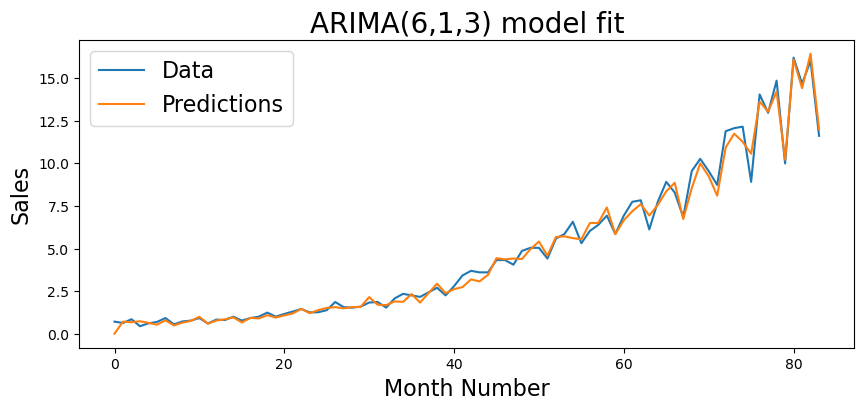

In [35]:
# Generate predictions using the model
conf_df = pd.concat([predictions_int.predicted_mean, predictions_int.conf_int()], axis = 1)

conf_df.head()

In [36]:
# change the name of the column heads
conf_df = conf_df.rename(columns={'predicted_mean': 'Predictions', 'lower data': 'Lower CI', 'upper data': 'Upper CI'})
conf_df.head()

In [37]:
# make a plot of model fit
# color = 'dodgeblue'

#fig = plt.figure(figsize = (8,5), dpi=144)
#ax1 = fig.add_subplot(111)



# Plot the data
fig, ax = plt.subplots(figsize = (8,5), dpi=144)
# Plot the data
ax.plot(jj_data['data'], 'b')

ax.set(title='Forecast of Johnson&Johnson Sales')


x = conf_df.index.values


upper = conf_df['Upper CI']
lower = conf_df['Lower CI']


# Plot the data
conf_df['Predictions'].plot(color = 'orange',label = 'Predicted' )
# Plot the data
upper.plot(color = 'grey', label = 'Upper CI', alpha=0.1)
# Plot the data
lower.plot(color = 'grey', label = 'Lower CI', alpha=0.1)

# fill between the conf intervals
ax.fill_between(x, lower, upper, color='grey', alpha=0.2)

plt.ylabel('EPS per share ($)', fontsize=12)
plt.xlabel('Month Number', fontsize=12)

plt.legend(loc = 'upper left', fontsize = 12)


plt.show()

C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\303028552.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\303028552.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\303028552.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\303028552.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:,

{'mape': 0.08960196449126984,
 'me': -0.08056933532783592,
 'mae': 0.27823570046689783,
 'mpe': -0.028059464689499942,
 'rmse': 0.4006208229655024,
 'corr': 0.9958012705869131,
 'minmax': 0.08446756101418784}

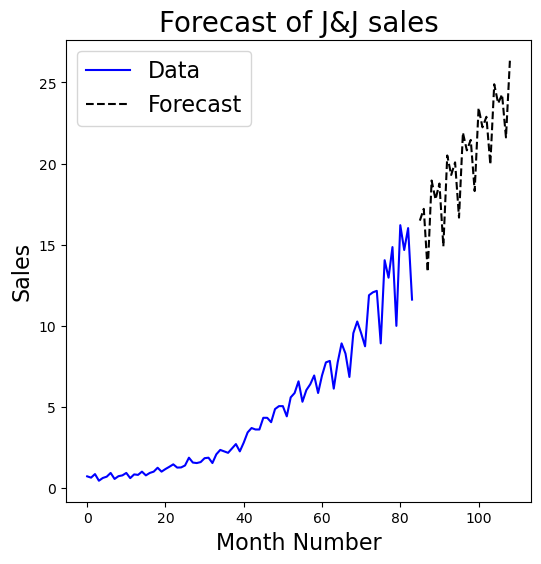

In [38]:
# Define ARIMA model with selected parameters
amzn_model = ARIMA(amzn_data['Close'], order=(3,1,3))

# Fit the model to training data
amzn_model_fit = amzn_model.fit()

In [39]:
# Fit the model to training data
print(amzn_model_fit.summary())

84     17.344399
85     16.482277
86     17.208350
87     13.335367
88     18.953278
89     17.791756
90     18.767431
91     14.895357
92     20.497667
93     19.297502
94     20.074250
95     16.667322
96     21.904126
97     20.814733
98     21.460094
99     18.304023
100    23.428591
101    22.235766
102    22.885077
103    19.948079
104    24.890703
105    23.717293
106    24.257850
107    21.612169
108    26.342805
109    25.172527
Name: predicted_mean, dtype: float64

In [40]:
# call opitimize_ARIMA

# Define ARIMA model with selected parameters
amzn_result_df = optimize_ARIMA(amzn_data['Close'], order_list)


# print out the ordered list.
amzn_result_df

,lower data,upper data
84,16.575626,18.113172
85,15.694982,17.269572
86,16.352441,18.064259
87,12.478565,14.192170
88,17.549165,20.357391
89,16.363864,19.219648
90,17.235968,20.298894
91,13.332088,16.458626
92,18.529440,22.465894
93,17.254205,21.340799


In [41]:
# p,d,q ARIMA Model
# Define ARIMA model with selected parameters
amzn_best_model = ARIMA(amzn_data['Close'], order=(2,1,2))

# Fit the model to training data
amzn_best_model_fit = amzn_best_model.fit()

,predicted_mean,lower data,upper data
84,17.344399,16.575626,18.113172
85,16.482277,15.694982,17.269572
86,17.208350,16.352441,18.064259
87,13.335367,12.478565,14.192170
88,18.953278,17.549165,20.357391


In [42]:
#summary of the model
# Fit the model to training data
print(amzn_best_model_fit.summary())

,Predictions,Lower CI,Upper CI
84,17.344399,16.575626,18.113172
85,16.482277,15.694982,17.269572
86,17.208350,16.352441,18.064259
87,13.335367,12.478565,14.192170
88,18.953278,17.549165,20.357391


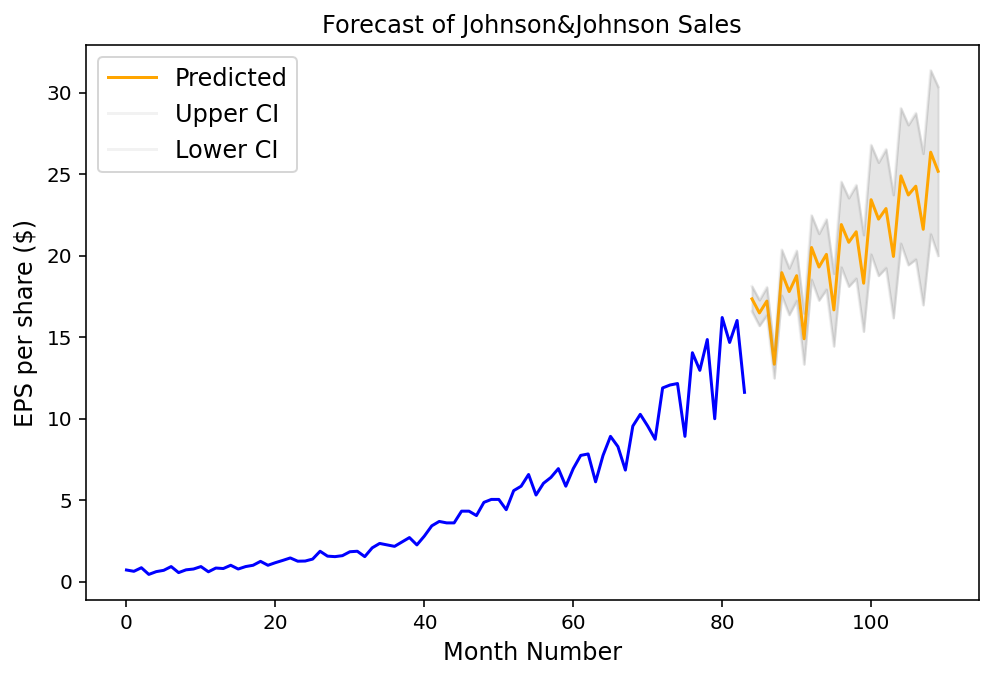

In [43]:
# Plot the data
amzn_best_model_fit.plot_diagnostics(figsize=(10,7))
plt.show()

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [45]:
#get prediction start and end dates
amzn_test_data = amzn_data['Close']

pred_start_date = amzn_test_data.index[0]
pred_end_date = amzn_test_data.index[-1]

#get the predictions and residuals
# Fit the model to training data
amzn_predictions = amzn_best_model_fit.predict(start=pred_start_date, end=pred_end_date)
# Generate predictions using the model
amzn_residuals = amzn_test_data - amzn_predictions

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3055.626
Date:                Tue, 08 Apr 2025   AIC                           6125.252
Time:                        00:22:06   BIC                           6161.213
Sample:                             0   HQIC                          6138.766
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7345      0.058    -12.629      0.000      -0.849      -0.621
ar.L2          0.6658      0.096      6.939      0.000       0.478       0.854
ar.L3          0.9193      0.056     16.354      0.0

In [46]:
# plot the residuals

plt.figure(figsize=(10,4))
# Plot the data
plt.plot(amzn_residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\2858361816.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/64 [00:00<?, ?it/s]

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sandr\a

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\a

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

,"(p, d, q)",AIC
0,"(2, 1, 2)",6122.315476
1,"(3, 1, 2)",6124.039832
2,"(2, 1, 3)",6124.044467
3,"(3, 1, 3)",6125.251778
4,"(4, 1, 2)",6125.951759
...,...,...
59,"(0, 1, 7)",6138.374108
60,"(7, 1, 0)",6138.584491
61,"(4, 1, 7)",6138.639316
62,"(7, 1, 7)",6139.478185


In [47]:
# Assess the root mean square of the residuals

print('Root Mean Squared Error:', np.sqrt(np.mean(amzn_residuals**2)))

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
# Plot the model prediction against the data

plt.figure(figsize=(10,4))

# Plot the data
plt.plot(amzn_test_data,color='blue')
# Plot the data
plt.plot(amzn_predictions,color='orange')

plt.legend(('Data', 'Predictions'), fontsize=16)

# Define ARIMA model with selected parameters
plt.title('ARIMA(2,1,2) model fit', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month Number', fontsize=16)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3056.158
Date:                Tue, 08 Apr 2025   AIC                           6122.315
Time:                        00:23:44   BIC                           6148.002
Sample:                             0   HQIC                          6131.969
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6946      0.015   -111.814      0.000      -1.724      -1.665
ar.L2         -0.9604      0.015    -64.729      0.000      -0.989      -0.931
ma.L1          1.6972      0.011    152.239      0.0

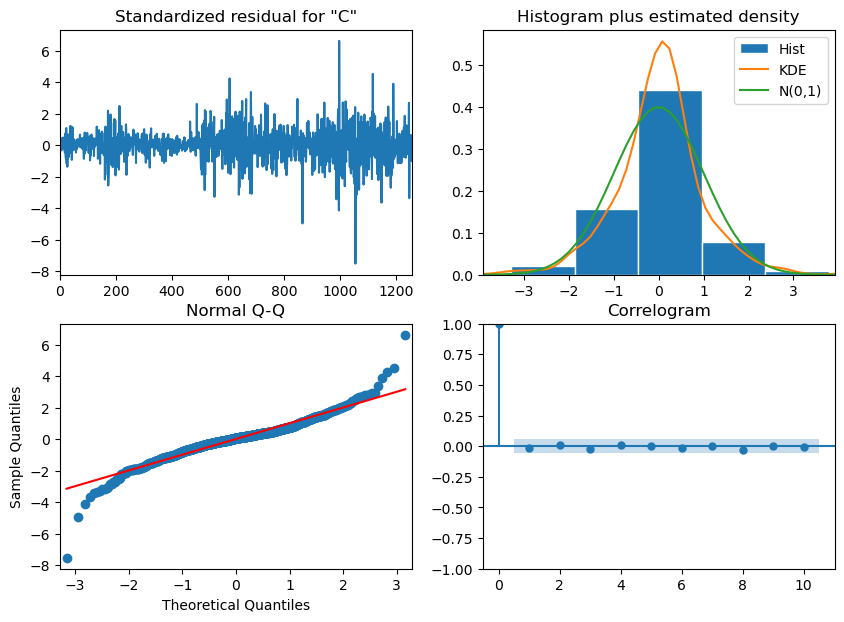

In [ ]:
# forecast version 1: get_prediction()

n_forecast = 24 #24 months


# Fit the model to training data
amzn_predict = amzn_best_model_fit.get_prediction(end=model.nobs + n_forecast)
# Get predicted mean (includes in-sample and forecast)
# Generate predictions using the model
predicted_mean = amzn_predict.predicted_mean

# Generate predictions using the model
forecast_conf_int = amzn_predict.conf_int()

# Create forecast index that starts after the last date in your original data
last_idx = amzn_data.index[-1]
forecast_index = pd.date_range(start=last_idx + pd.offsets.MonthEnd(1), periods=n_forecast, freq='M')

# Extract the lower and upper bounds from the forecast confidence interval
lower_bound = forecast_conf_int.iloc[:, 0]  # lower bound
upper_bound = forecast_conf_int.iloc[:, 1]  # upper bound



# plot
# Plot the data
fig, ax = plt.subplots()
# Plot the data
amzn_data['Close'].plot(ax=ax, label='Data', color='blue')

# Plot forecast
# Plot the data
ax.plot(forecast_index, predicted_mean[-n_forecast:], 'k--', label='Forecast',color='red')

# # Plot confidence interval boundaries
ax.fill_between(forecast_index,
                lower_bound[-n_forecast:], upper_bound[-n_forecast:],
                color='grey',
                alpha=0.3,
                label='95% Confidence Interval')

# Labels and formatting
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Forecast of AMZN Sales')
plt.legend(fontsize=10,loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# make the predictions for 24 steps ahead
# Fit the model to training data
amzn_predictions_int = amzn_best_model_fit.get_forecast(steps=24)
# Generate predictions using the model
amzn_predictions_int.predicted_mean

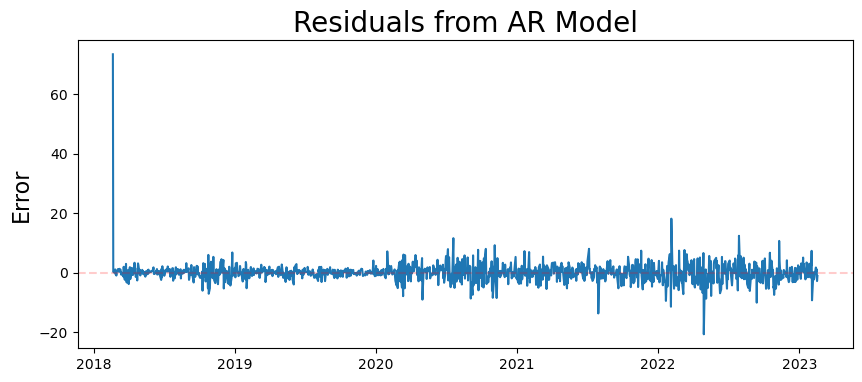

In [52]:
# make a plot of model fit
# color = 'dodgeblue'

#fig = plt.figure(figsize = (8,5), dpi=144)
#ax1 = fig.add_subplot(111)



# Plot the data
fig, ax = plt.subplots(figsize=(10,6), dpi=144)

# Plot actual data
# Plot the data
ax.plot(amzn_data['Close'], color='blue', label='Actual')

# Plot predicted mean
# Plot the data
ax.plot(forecast_index, amzn_conf_df['predicted_mean'], color='orange', linestyle='--', label='Forecast')

# # Plot confidence interval boundaries
ax.fill_between(forecast_index,
                amzn_conf_df['lower Close'],
                amzn_conf_df['upper Close'],
                color='grey',
                alpha=0.3,
                label='95% Confidence Interval')

# Labels and title
ax.set_title('Forecast of AMZN Closing Sales', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Close Price ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()


Root Mean Squared Error: 3.437714287175116


Text(0.5, 0, 'Month Number')

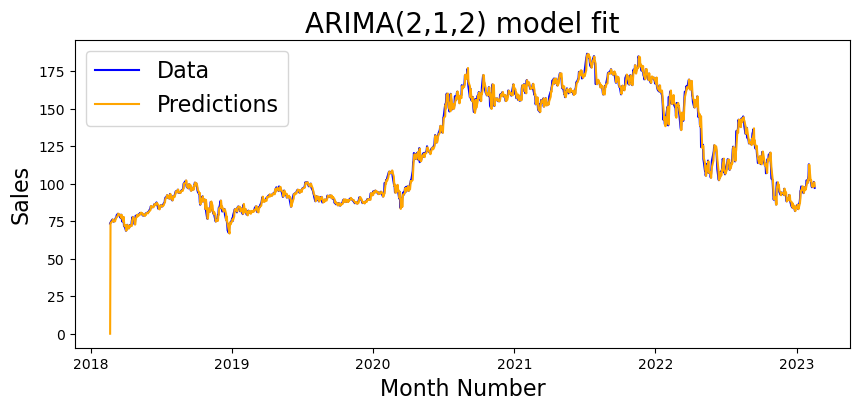

In [54]:
# Generate predictions using the model
forecast_accuracy(amzn_predictions, amzn_test_data)

C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\303028552.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\303028552.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\303028552.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\303028552.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:,

{'mape': 0.016931562175109802,
 'me': -0.07707837399287752,
 'mae': 1.9760997604844854,
 'mpe': -0.0007597541944668388,
 'rmse': 3.437714287175116,
 'corr': 0.9951401775635079,
 'minmax': 0.01666692323748875}

C:\Users\sandr\AppData\Local\Temp\ipykernel_24960\4038983842.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(forecast_index, predicted_mean[-n_forecast:], 'k--', label='Forecast',color='red')


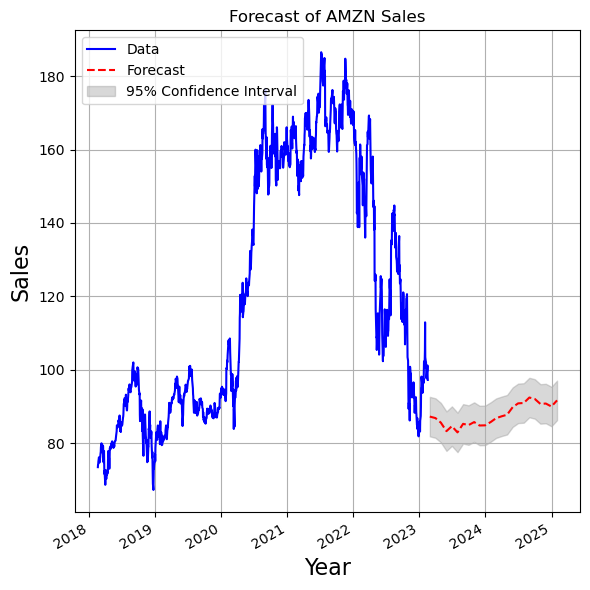

In [73]:
# forecast version 1: get_prediction()

n_forecast = 24 #24 months


# Fit the model to training data
amzn_predict = amzn_best_model_fit.get_prediction(end=model.nobs + n_forecast)
# Generate predictions using the model
predicted_mean = amzn_predict.predicted_mean

# Generate predictions using the model
forecast_conf_int = amzn_predict.conf_int()
last_idx = amzn_data.index[-1]
forecast_index = pd.date_range(start=last_idx + pd.offsets.MonthEnd(1), periods=n_forecast, freq='M')

# Extract the lower and upper bounds
lower_bound = forecast_conf_int.iloc[:, 0]  # lower bound
upper_bound = forecast_conf_int.iloc[:, 1]  # upper bound



# plot
# Plot the data
fig, ax = plt.subplots()
# Plot the data
amzn_data['Close'].plot(ax=ax, label='Data', color='blue')

# Plot forecast (only last n_forecast points)
# Plot the data
ax.plot(forecast_index, predicted_mean[-n_forecast:], 'k--', label='Forecast',color='red')

# # Plot confidence interval boundaries
ax.fill_between(forecast_index,
                lower_bound[-n_forecast:], upper_bound[-n_forecast:],
                color='grey',
                alpha=0.3,
                label='95% Confidence Interval')

# Labels and formatting
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Forecast of AMZN Sales')
plt.legend(fontsize=10,loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
# make the predictions for 24 steps ahead
# Fit the model to training data
amzn_predictions_int = amzn_best_model_fit.get_forecast(steps=24)
# Generate predictions using the model
amzn_predictions_int.predicted_mean

C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sandr\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1259    97.138878
1260    97.100050
1261    97.224545
1262    97.050870
1263    97.225609
1264    97.096299
1265    97.147605
1266    97.184852
1267    97.072460
1268    97.227143
1269    97.072964
1270    97.185675
1271    97.142752
1272    97.107240
1273    97.208640
1274    97.070917
1275    97.206913
1276    97.108727
1277    97.144500
1278    97.178178
1279    97.086753
1280    97.209335
1281    97.089416
1282    97.174899
Name: predicted_mean, dtype: float64

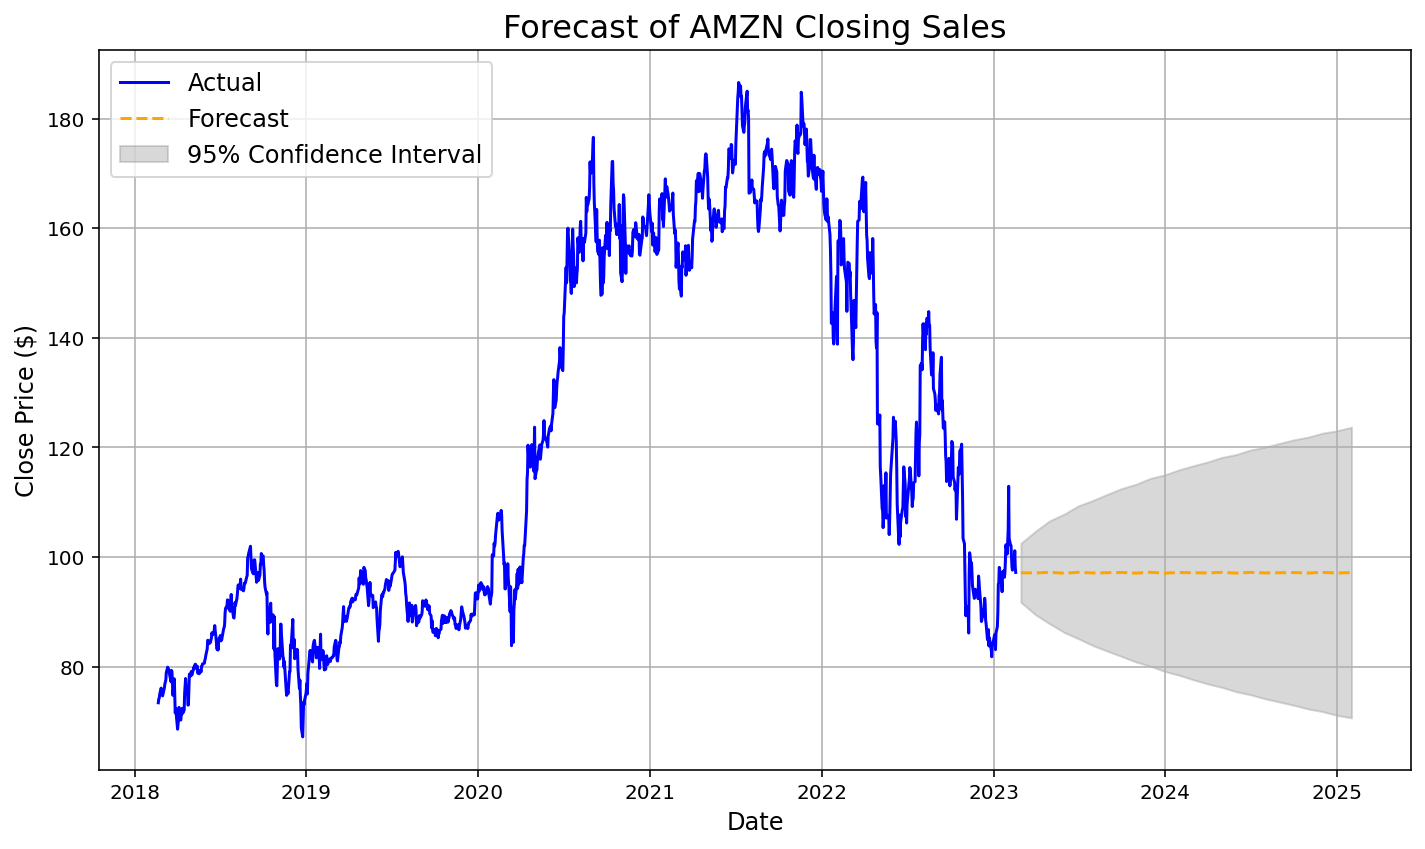

In [67]:
# make a plot of model fit
# color = 'dodgeblue'

#fig = plt.figure(figsize = (8,5), dpi=144)
#ax1 = fig.add_subplot(111)



# Plot the data
fig, ax = plt.subplots(figsize=(10,6), dpi=144)

# Plot the data
ax.plot(amzn_data['Close'], color='blue', label='Actual')
ax.plot(forecast_index, amzn_conf_df['predicted_mean'], color='orange', linestyle='--', label='Forecast')

# # Plot confidence interval boundaries
ax.fill_between(forecast_index,
                amzn_conf_df['lower Close'],
                amzn_conf_df['upper Close'],
                color='grey',
                alpha=0.3,
                label='95% Confidence Interval')

# Labels and title
ax.set_title('Forecast of AMZN Closing Sales', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Close Price ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()


## LSTM/GRU Modeling and Forecasts

This section includes neural network-based modeling for Johnson & Johnson and Amazon using LSTM.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import LSTM, Dense
from keras.utils import set_random_seed
import warnings

In [30]:
def timeseries_to_supervised(data, lag=1):
  """ Function to transform data to be supervised learning.
  Returns the transformed dataframe.
  Args:
    data: A list of data to be transformed.
    lag: Number of lag needed.
    """

  df = pd.DataFrame(data)
  columns = [df.shift(i) for i in range(1, lag+1)]
  columns.append(df)
  df = pd.concat(columns, axis=1)
  df.fillna(0, inplace=True)
  return df

In [33]:
def scale(train, test):
  """ Function to scale train and test data to [-1, 1]
  Returns the scaler, scaled train and test data.
  Args:
    train: A list of train data to be scaled.
    test: A list of test data to be scaled.
    """

  # fit scaler
# Scale the data to the range [-1, 1]
  scaler = MinMaxScaler(feature_range=(-1, 1))
# Fit the model to training data
  scaler = scaler.fit(train)

  # transform train
  train = train.reshape(train.shape[0], train.shape[1])
  train_scaled = scaler.transform(train)

  # transform test
  test = test.reshape(test.shape[0], test.shape[1])
  test_scaled = scaler.transform(test)
  return scaler, train_scaled, test_scaled

In [68]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Fit the model to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
# Fit the model to training data
    """Function to fit an LSTM network to training data.
    Returns the model.

    Args:
        train: Data to be trained.
        batch_size: Batch size for training.
        nb_epoch: Number of epochs.
        neurons: Number of neurons.
    """
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])  # [samples, time steps, features]

# Initialize the LSTM model architecture
    model = Sequential()
    model.add(LSTM(neurons, activation='relu', input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
# Calculate RMSE to evaluate model performance
    model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to training data
    model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=0, shuffle=False)

    return model

In [69]:
# Train the LSTM model and forecast
def forecast_lstm(model, batch_size, X):
  """ Function to make a one-step forecast.
  Returns the forecast.
  Args:
    model: Model to forecast the data.
    batch_size: Batch size used.
    X: Data to be forecasted.
  """

  X = X.reshape(1, 1, len(X))
# Generate predictions using the model
  yhat = model.predict(X, batch_size=batch_size)
  return yhat[0,0]

In [70]:
def invert_scale(scaler, X, value):
  """ Function to inverse scaling.
  Returns the inverted data.
  Args:
    scaler: Scaler used to scale the data before.
    X: Original data.
    value: Value to be inverted.
  """

  new_row = [x for x in X] + [value]
  array = np.array(new_row)
  array = array.reshape(1, len(array))
  inverted = scaler.inverse_transform(array)
  return inverted[0, -1]


def inverse_difference(history, yhat, interval=1):
  """ Function to inverse the differencing.
  Returns the inverted data.
  Args:
    history: Original data.
    yhat: Data to be inverted.
    interval: Interval used.
  """
  return yhat + history[-interval]

### Johnson and Johnson 

In [109]:
# Load the dataset
jj_df = pd.read_csv('./jj.csv')

In [110]:
# convert the 'date' column to datetime format
jj_df['date']= pd.to_datetime(jj_df['date'])
# set index
# Set the date column as the index for time series
jj_df.set_index('date', inplace=True)

In [92]:
# perform log transformation as lamda value of boxcox is close to zero
log_jj = np.log(jj_df['data'])

In [93]:
# use the differencing operator
diff_log_jj = log_jj.diff().dropna()

In [94]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(data=diff_log_jj, lag=1)
supervised_values = supervised.values

In [95]:
# split data into train and test sets
train, test = supervised_values[0:-16], supervised_values[-16:] # around 20% data as test data

In [96]:
# scale of the data between -1 and 1
scaler, train_scaled, test_scaled = scale(train, test)

In [97]:
# forecast of LSTM can be sensitive to initial conditions, so repeat modelling

# create required empty lists
repeats = 30
error_scores = list()
pred_list = list()
# for loop to repeat experiment
for r in range(repeats):
    # fit the model
# Fit the model to training data
    lstm_model = fit_lstm(train=train_scaled, batch_size=1, nb_epoch=50,
                          neurons=4)

    # forecast the entire training dataset to build up state for forecasting
    train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
# Generate predictions using the model
    lstm_model.predict(train_reshaped, batch_size=1)

    # walk-forward validation on the test data
# Generate predictions using the model
    predictions = list()
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
# Train the LSTM model and forecast
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler=scaler, X=X, value=yhat)
        # invert differencing
        yhat = inverse_difference(history=log_jj, yhat=yhat,
                                  interval=len(test_scaled)+1-i)
        # store forecast
# Generate predictions using the model
        predictions.append(yhat)

    # report performance
# Generate predictions using the model
    rmse = np.sqrt(mean_squared_error(log_jj[-16:], predictions))
    print('%d) Test RMSE: %.3f' % (r+1, rmse))
    # record predictions and rmse
# Generate predictions using the model
    pred_list.append(predictions)
    error_scores.append(rmse)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1) Test RMSE: 0.205
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━

In [98]:
results = pd.DataFrame()
results['RMSE'] = error_scores
print(results.describe(), '\n')

            RMSE
count  30.000000
mean    0.209794
std     0.009711
min     0.201878
25%     0.204002
50%     0.204739
75%     0.209800
max     0.230684 



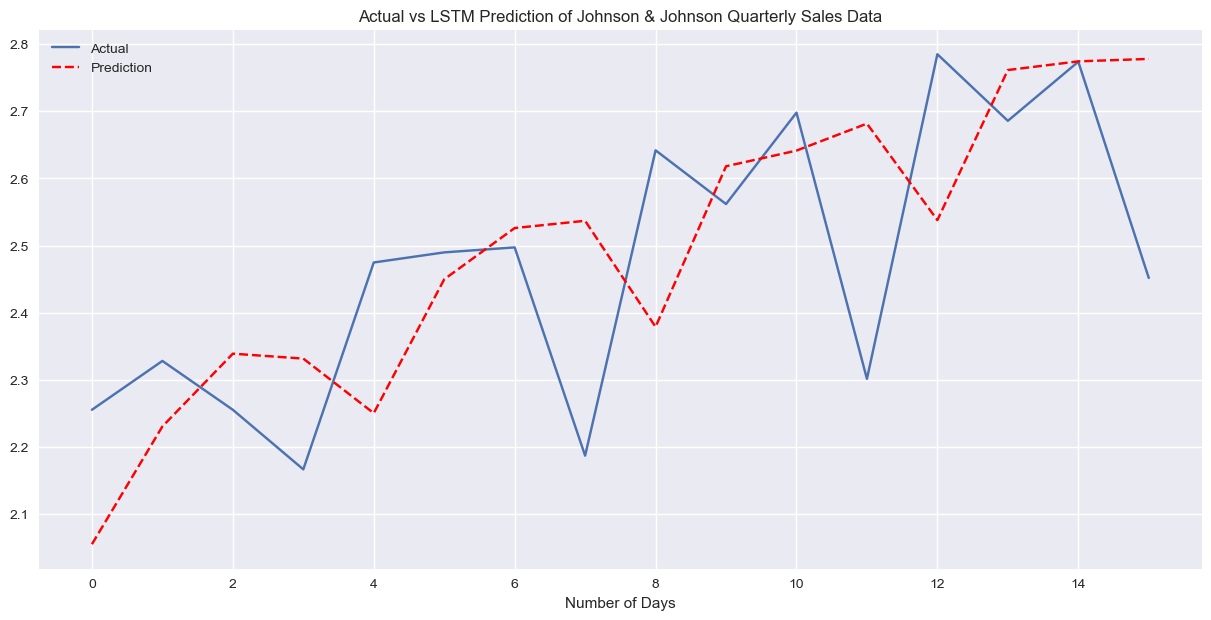

In [99]:
# plot actual and predicted data
plt.figure(figsize=(15,7))
# Plot the data
plt.plot(log_jj[-16:].values, label='Actual')
# Plot the data
plt.plot(pred_list[np.argmin(results)], 'r--', label='Prediction')
plt.xlabel('Number of Days')
plt.title('Actual vs LSTM Prediction of Johnson & Johnson Quarterly Sales Data')
plt.legend()
plt.savefig('lstm_pred_jj.png', dpi=300, bbox_inches="tight")
plt.show()

### AMAZON 

In [111]:
# Load the dataset
amzn_df = pd.read_csv('./AMZN.csv')

In [112]:
# convert the 'date' column to datetime format
amzn_df['Date']= pd.to_datetime(amzn_df['Date'])
# set index
# Set the date column as the index for time series
amzn_df.set_index('Date', inplace=True)

In [102]:
# find best lambda
boxcox_amzn, lam = boxcox(amzn_df['Close'])
# print lambda
print(f'Lambda = {lam}')
# convert to Dataframe
boxcox_amzn = pd.DataFrame(boxcox_amzn)
# use the differencing operator
diff_boxcox_amzn = boxcox_amzn.diff().dropna()

Lambda = -0.36999985006271


In [103]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(data=diff_boxcox_amzn, lag=1)
supervised_values = supervised.values

In [104]:
# split data into train and test sets
train, test = supervised_values[0:-250], supervised_values[-250:]

In [105]:
# scale the data to -1 and 1
scaler, train_scaled, test_scaled = scale(train, test)

In [1]:
# fit the model
# Fit the model to training data
lstm_model = fit_lstm(train=train_scaled, batch_size=1, nb_epoch=50,
                      neurons=4)

# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
# Generate predictions using the model
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
# Generate predictions using the model
predictions = list()
for i in range(len(test_scaled)):
  # make one-step forecast
  X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
# Train the LSTM model and forecast
  yhat = forecast_lstm(lstm_model, 1, X)
  # invert scaling
  yhat = invert_scale(scaler=scaler, X=X, value=yhat)
  # invert differencing
  yhat = inverse_difference(history=boxcox_amzn.values, yhat=yhat,
                            interval=len(test_scaled)+1-i)
  # store forecast
# Generate predictions using the model
  predictions.append(yhat)

# report performance
# Generate predictions using the model
rmse = np.sqrt(mean_squared_error(boxcox_amzn[-250:], predictions))
print('Test RMSE =', np.round(rmse, 3))

NameError: name 'fit_lstm' is not defined

In [107]:
rmse

0.0054281249223784595

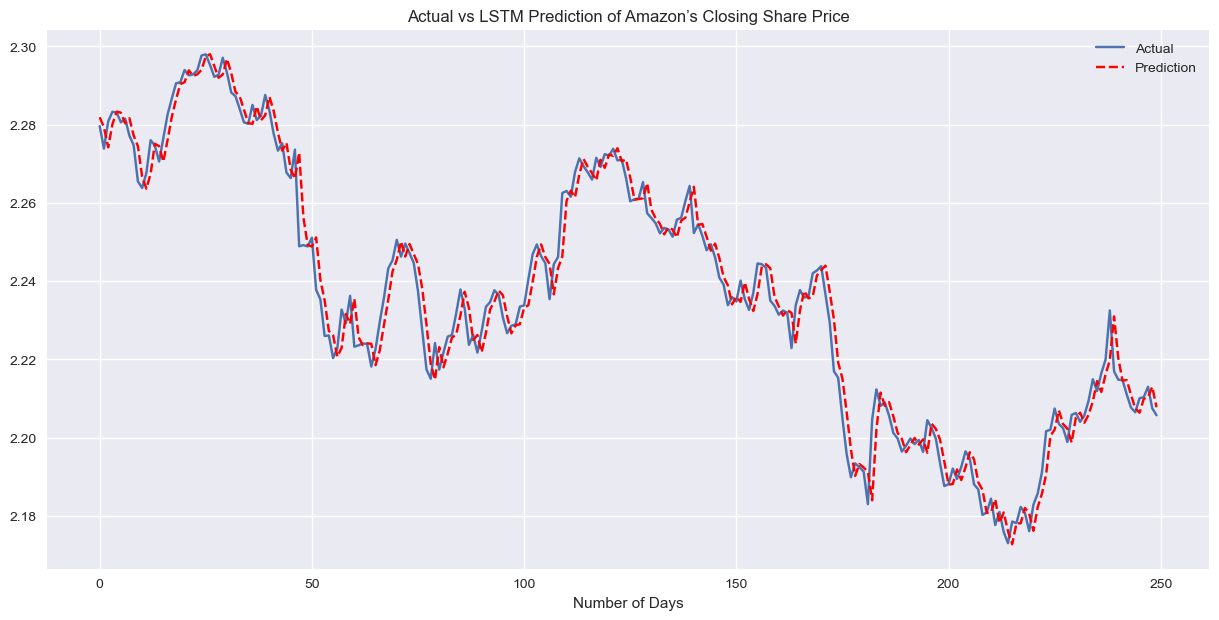

In [113]:
plt.figure(figsize=(15,7))
# Plot the data
plt.plot(boxcox_amzn[-250:].values, label='Actual')
# Plot the data
plt.plot(predictions, 'r--', label='Prediction')
plt.xlabel('Number of Days')
plt.title('Actual vs LSTM Prediction of Amazon’s Closing Share Price')
plt.legend()
plt.show()